In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('D:/Study/MCA/5thSem/ML/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [2]:
df.keys()

Index(['Position', 'Level', 'Salary'], dtype='object')

In [3]:
print(df['Salary'])

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


# Set up Dataframe

In [4]:
df['Position']

0     Business Analyst
1    Junior Consultant
2    Senior Consultant
3              Manager
4      Country Manager
5       Region Manager
6              Partner
7       Senior Partner
8              C-level
9                  CEO
Name: Position, dtype: object

In [5]:
df['Level']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [6]:
df['Salary']

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Position'] = le.fit_transform(df.Position)
df['Level'] = le.fit_transform(df.Level)
df['Salary'] = le.fit_transform(df.Salary)
df.head()

,Position,Level,Salary
0,0,0,0
1,4,1,1
2,8,2,2
3,5,3,3
4,3,4,4


In [9]:
x=df.iloc[:,0:2]
x=np.asarray(x)
x
y=df['Salary']
y = np.asarray(y)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

# Train SVR

In [12]:
from sklearn.svm import SVR

In [13]:
model = SVR()

In [14]:
model.fit(x_train, y_train)

C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Predictions and Evaluation

In [15]:
predictions = model.predict(x_test)

# Gridsearch

In [19]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

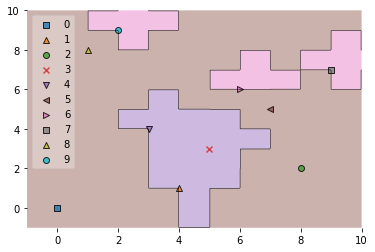

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf = model,legend=2)

In [22]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, cv = 7)

In [31]:
grid.fit(x_train, y_train)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\

[CV] ............. C=10, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............. C=10, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............. C=10, gamma=1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=nan, total=   0.0s


C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
grid.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
grid_predictions = grid.predict(x_test)

In [37]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

C:\Anaconda\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


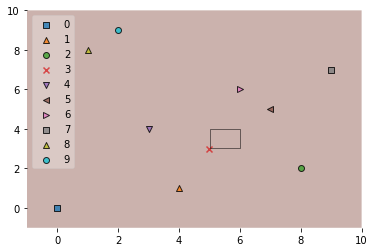

In [38]:
plot_decision_regions(x,y,clf = grid,legend=2)